# 결정트리(*)

## 개념 / 개요

- 데이터에 있는 규칙을 학습을 통해서 자동으로 찾아내어, **트리 기반**으로 **규칙**을 만드는 알고리즘
- 성능
  - 어떤 기준으로 규칙을 만들 것인가?
    - 파라미터로 설정 된다
  - 효율성(공통)

- 용어 정리
  - 노드 : 가지치기해서 트리가 하위로 내려갈때, 분기점, 끝점
  - 루트 노드 : 시작점, 일종의 규칙노드임
  - 규칙 노드 : 가지 치기를 하는 규칙이 존재한다
    - 서브 트리가 만들어진다
    - 규칙 : 피처들을 이용(결합)하여 규칙 조건을 만들어 낸다
  - 리프 노드 : 더이상 분기점이 없다. 끝. 어떤 결정된 클레스(레이블, 정답)값을 가진다



- 요소 정리
  - depth : 깊이. 깊이값이 클수록 -> 과적합 될수 있다. 찾는데 오래 걸리므로 연산비용이 많이 발생 => 임계값이 필요 => 튜닝 포인트
  - 균형점 : 트리의 규형을 지키는게 일반적
    - 균형을 깨고 비대칭으로 가는 구조 LigthGBM
    - 균형을 지킬려고 한다면, 데이터 전처리가 필수
    - 한쪽 쏠림, 과적합에 대한 깊이등등 튜닝 포인트

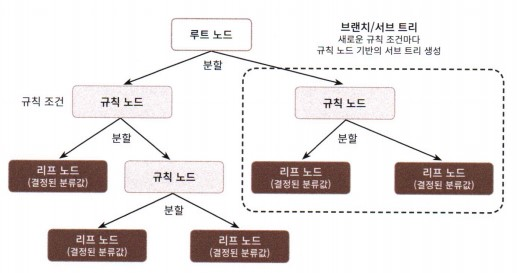

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_결정트리.jpg')

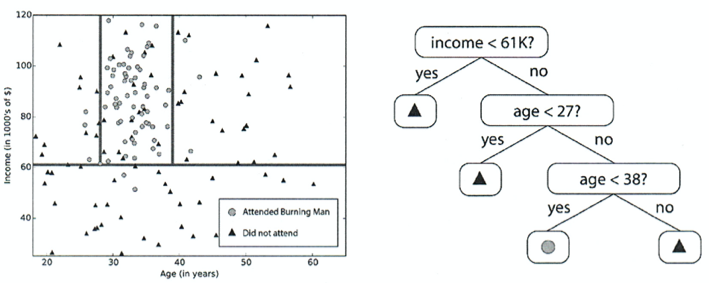

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/ml-의사결정트리.png')
# 규칙노드에 규칙을 묘사한 예시

## 목표

- 결정트리 알고리즘은 **데이터의 균일도**(정보의 균일성)을 높게 되도록 **데이터 세트가 선택되게 규칙**을 만드는것
- 방법 (규칙노드에서 규칙 생성시 기준)
  - 지수를 사용
    - 엔트로피를 이용한 정보이득 지수
      - **정보이득 지수** = 1 - 엔트로피
      - 엔트로피 : 혼잡도를 의미
      - **정보이득 지수값이 최대가 되는쪽으로 방향성**
        - 엔트로피가 작아져야 한다
        - 혼잡도(불순도)이 낮아진다
        - 단일 유형의 데이터로 구성되어 있다
      - 엔트로피가 크다 -> 혼잡도(불순도) 크다 -> 데이터가 여려개가 섞여 있다
    - **지니계수(기본값)**
      - 값이 크면, 불순도가 높다
      - 값이 작으면, 불순도가 낮다 -> 추구하는 방향성

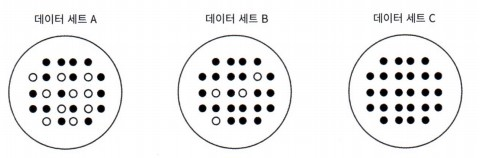

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_결정트리2.jpg')
# 엔트로피 기준
# 데이터 c : 정보가 균일하다 => 엔트로피 작다 => 정보이득지수(1-엔트로피) 크다
# 지니 계수 기준
# 데이터 a : 지니 계수 크다 => 불순도가 높다 => 1에 가까울수록-불균등면적이크다-불평등하다
# 데이터 c : 데이터가 균일-완전균등분배-평등하다-0에 가깞다

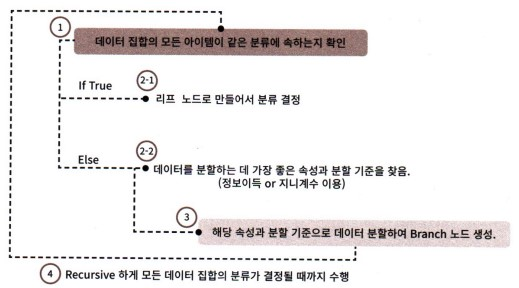

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_결정트리3.jpg')
# 가지치기, 서브 트리가 만들어짐
# 리프노드가 만들어지는 기준

# 데이터집합이 모든 같은 분류이거나, 가지치기에 적합한 개수의 샘플수가 아니라면 리프노드 확정
# 가지치기에 적합한 조건 => 하이퍼파라미터 튜닝의 대상 => 성능이 결정됨

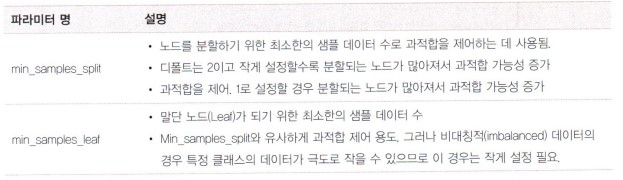

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_결정트리4.jpg')

# min_samples_split : 과적합 방지용
# 정수 => 개수, 실수 => 비율

# min_samples_leaf : 말단 노드가 되기 위한 최소 데이터수, 기본값 1
# 정수 => 개수, 실수 => 비율 (데이터가 100개, 0.1 => 10%를 의미한다)

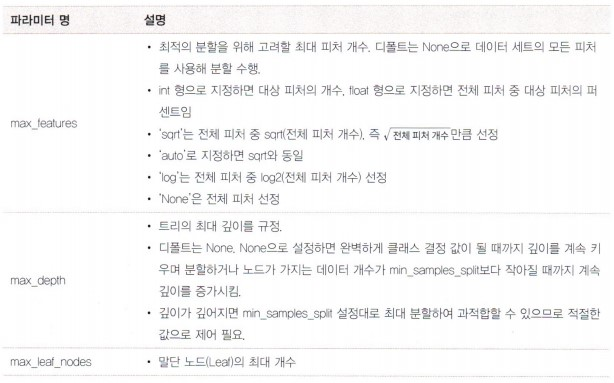

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_결정트리5.jpg')

# max_features : 규칙노드에서 몇개의 피처를 가지고 규칙을 구성할 것인가
# 정수 => 개수, 실수 => 비율
# 세팅하지 않으면 전체 피처 사용

# max_depth : 최대깊이, 세팅하지 않으면 min_samples_split 제한선까지 계속 깊어진다
# 과적합 문제 발생 가능 -> 조정 필요

# criterion : 규칙노드 기준 지수 지정 : gini(기본값), entropy

## 기본 적용

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 1. 알고리즘 생성 , 난수 시드 고정 -> 항상 동일한 결과를 내겠금 조정
model = DecisionTreeClassifier( random_state=0 )

# 2. 데이터 준비
iris  = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,  
                                    iris.target, test_size=0.25, stratify=iris.target , random_state=0)

# 3. 학습 -> 결정트리를 완성
model.fit( X_train, y_train )

# 4. 예측, 성능평가
score = model.score(  X_test, y_test )
print( score )

0.9736842105263158


## 학습을 통해 완성된 트리를 시각적 확인

In [ ]:
from sklearn.tree import export_graphviz
# 덤프
export_graphviz(model, out_file='tree.model', 
                feature_names=iris.feature_names, 
                class_names=iris.target_names, filled=True)

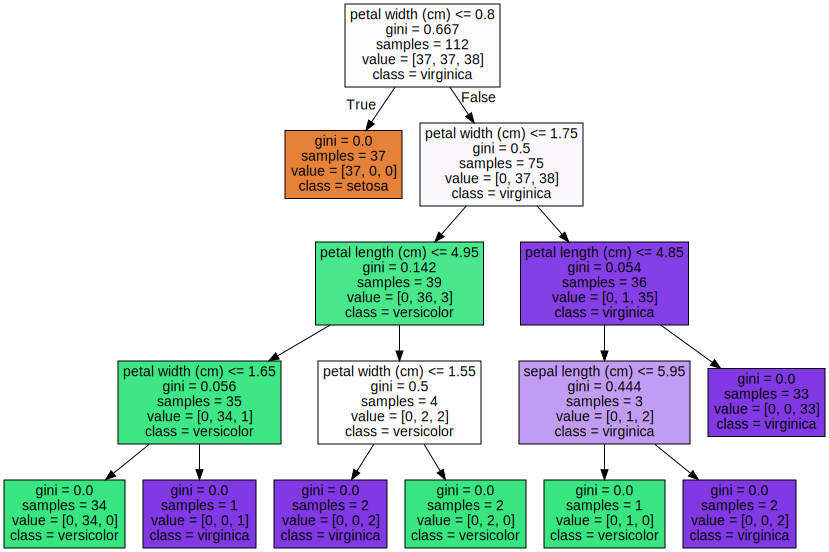

In [ ]:
# 시각화
import graphviz
# 덤프파일로드
with open('tree.model') as f:
  model_gra = f.read()
# 시각화
graphviz.Source( model_gra )

# 루트 노드에서 정답 데이터의 분포를 살펴보니 불균형 하다 : value = [37, 34, 41]
# train_test_split에서 층화 옵션을 사용하여서 균형을 맞춰서 다시 진행

# 루트 노트에서 바로 setosa가 한번의 조건으로 분류가 완료되었다 
# => setosa는 분포상 동떨어져 있을 가능성이 크다(산포행렬로 시각화)

# 해당 노드의 데이터 상황, 이에 따른 혼잡도를 표현한 지수값, 조건 체크
# 규칙 노드를 살펴보니 사용하지 않는 피처가 존재한다 -> 중요한 피처, 중요하지 않는 피처 구분가능

In [ ]:
# 중요한 피처, 중요하지 않는 피처 구분가능
import numpy as np
model.feature_importances_, iris.feature_names, np.sum(model.feature_importances_)
# sepal length (cm) => 중요도 값 0 => 차후 피처 제거에 사용할수 있다 
# -> 연산비용 절감, 학습시간 단축 -> 성능 높이는데 유리한 조건

# 단, stratify=iris.target 이 옵션을 사용함으로써, 훈련용 데이터의 정답별 비율을 균일하게 조정하니
# 피처 중요도에 변화가 왔음

(array([0.01785857, 0.        , 0.02955658, 0.95258485]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 1.0)

In [ ]:
# 피처별 중요도 시각화
import seaborn as sns
import numpy as np

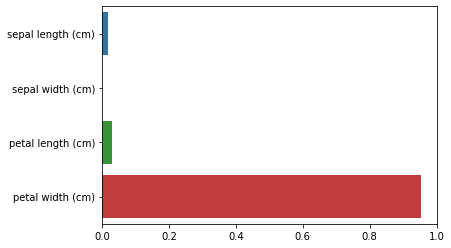

In [ ]:
sns.barplot( x=np.round(model.feature_importances_, 3), y=iris.feature_names );

## 산포도기반 분류 영역 그리기

- 좌표계가 2d 이므로, 중요 피처 2개를 기준으로 시각화 하겠다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

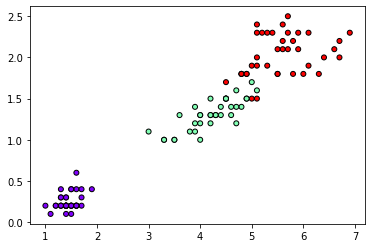

In [ ]:
def show_clf_boundary( clf, X, y ):
  # 차트 정보
  _, ax = plt.subplots()

  # 산포도, 중요 피처 2개를 사용하여 그리겟다 
  ax.scatter( X[ : , 2 ], X[ : , 3 ], c=y,
              s=25, marker='o', edgecolors='k', cmap='rainbow',
              zorder=5, # 해당 데이터 포인트가 zoder 5보다 낮은 차트보다 위에 존재하게됨
              clim = ( y.min(), y.max() )
             )
  pass

show_clf_boundary( DecisionTreeClassifier(random_state=0), X_train, y_train )

In [ ]:
# 시작값, 끝값 사이를 동일한 간격으로 num개수만큰 세그먼트(조각)을 생성한다->수치 생성
np.linspace( 1, 5, num=5), np.linspace( 20, 25, num=5)

(array([1., 2., 3., 4., 5.]), array([20.  , 21.25, 22.5 , 23.75, 25.  ]))

In [ ]:
xx, yy = np.meshgrid( np.linspace( 1, 5, num=5), np.linspace( 20, 25, num=5) )
xx.shape, yy.shape

((5, 5), (5, 5))

In [ ]:
xx.ravel() # x축이 왼족에서 오른족으로 반복한다

array([1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2.,
       3., 4., 5., 1., 2., 3., 4., 5.])

In [ ]:
yy.ravel() # x축이 왼->오른족으로 5회 이동하는동안 y는 고정 => 수평선을 찍었다 -> 5회반복

array([20.  , 20.  , 20.  , 20.  , 20.  , 21.25, 21.25, 21.25, 21.25,
       21.25, 22.5 , 22.5 , 22.5 , 22.5 , 22.5 , 23.75, 23.75, 23.75,
       23.75, 23.75, 25.  , 25.  , 25.  , 25.  , 25.  ])

0.705 7.195 -0.01999999999999999 2.62
(200, 200) (200, 200)
(40000,) (40000,)
(40000, 2)


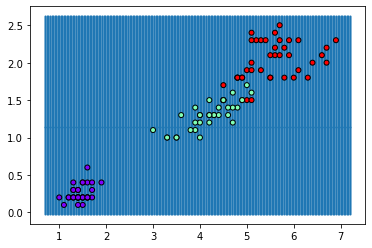

In [ ]:
def show_clf_boundary( clf, X, y ):  
  _, ax = plt.subplots()
  ax.scatter( X[ : , 2 ], X[ : , 3 ], c=y,s=25, marker='o', edgecolors='k', cmap='rainbow',zorder=5,clim = ( y.min(), y.max() ) )

  # x/y 축 경계 정보 -> 구해서-> 모델에 넣어서 예측 -> 분류값 -> 특정색으로 채우면 => 합쳐져서 면적으로 표현
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()
  print( xlim_start, xlim_end, ylim_start, ylim_end ) # 피처값의 시작~끝값

  # 해당 값을 기준으로 세그먼트를 나눠서 좌표를 준비
  xx, yy = np.meshgrid( np.linspace(xlim_start, xlim_end, num=200),np.linspace(ylim_start, ylim_end, num=200) )
  print( xx.shape, yy.shape ) # (200,200), (200,200)

  # (200,200), (200,200) => (40000, 2)
  # xx.ravel() => 2차원(n차원)을 1차원으로 펴주는 함수 : flattern:펴준다
  print( xx.ravel().shape, yy.ravel().shape )
  tmp = np.c_[xx.ravel(), yy.ravel()] # (40000, 2)
  print( tmp.shape )
  
  # 위에 그린 산포드 밑으로 점을 찍겟다 zorder=1
  ax.scatter( tmp[:, 0], tmp[:, 1], s=1, zorder=1 )


  pass

show_clf_boundary( DecisionTreeClassifier(random_state=0), X_train, y_train )

(40000,) [0 1 2]


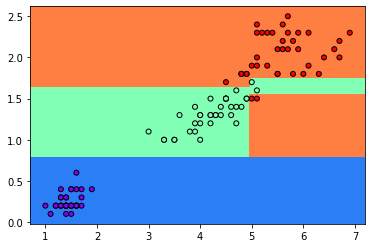

In [ ]:
def show_clf_boundary( clf, X, y ):  
  _, ax = plt.subplots()
  ax.scatter( X[ : , 2 ], X[ : , 3 ], c=y,s=25, marker='o', edgecolors='k', cmap='rainbow',zorder=5,clim = ( y.min(), y.max() ) )

  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()  
  xx, yy = np.meshgrid( np.linspace(xlim_start, xlim_end, num=200),np.linspace(ylim_start, ylim_end, num=200) )
  tmp = np.c_[xx.ravel(), yy.ravel()] # (40000, 2)
  #ax.scatter( tmp[:, 0], tmp[:, 1], s=1, zorder=1 )

  # 학습 -> 2개 중요피처로만 학습
  clf.fit( X[:, 2:], y ) # 차후 여러가지 변형 가능함
  Z = clf.predict( tmp )
  print( Z.shape, np.unique(y) )

  # 면적 그리기 -> 등고선플롯
  ax.contourf( xx, # (200,200)
               yy, # (200,200)
               Z.reshape( xx.shape ), # (40000, ) -> (200,200)
               alpha=1.0,
               cmap='rainbow',
               zorder=1,
               levels=np.arange( 1 + len(np.unique(y)) ) - 0.5  # 면적별 색상에 영향
  )
  return clf

clf = show_clf_boundary( DecisionTreeClassifier(random_state=0), X_train, y_train )

# 데이터가 속한 분류값으로 면적이 채워졌다 -> 해당 영역은 그 분류값으로 인지한다
# 여기서 생성된 모델을 이용하여, 테스트 데이터를 넣었을때 얼마나 잘 분류하는지 그리시오

DecisionTreeClassifier(random_state=0)

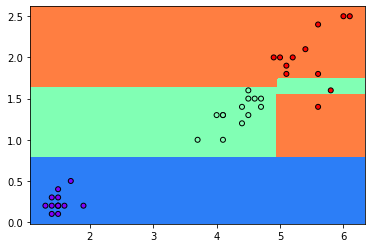

In [ ]:
def show_clf_boundary_by_pretrained( clf, X, y ):
  '''
    학습된 모델, 테스트 데이터을 넣어서 분류영역 그리기
  ''' 
  _, ax = plt.subplots()
  ax.scatter( X[ : , 2 ], X[ : , 3 ], c=y,s=25, marker='o', edgecolors='k', cmap='rainbow',zorder=5,clim = ( y.min(), y.max() ) )

  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()  
  xx, yy = np.meshgrid( np.linspace(xlim_start, xlim_end, num=200),np.linspace(ylim_start, ylim_end, num=200) )
  tmp = np.c_[xx.ravel(), yy.ravel()]
  
  Z = clf.predict( tmp )
  ax.contourf( xx,yy,Z.reshape( xx.shape ),alpha=1.0,cmap='rainbow',
               zorder=1,levels=np.arange( 1 + len(np.unique(y)) ) - 0.5)
  return clf

show_clf_boundary_by_pretrained( clf, X_test, y_test )

# 전체 데이터 중에 1개 데이터만 분류를 잘못했고, 대부분은 정상적으로 분류했다
# 여러개의 피처가 영향을 받는 모델인 경우는 아래처럼 그리기가 어렵다

# 앙상블 학습

- Ensemble Learning
- 여러개의 알고리즘(분류용)을 생성(동일, 서로다른)하여, 학습후(여러기법이 존재), 각각의 모델이 예측한 값은 처리(다수결, 평균)후 선택하여 최종 결과를 도출하는 기법
- 약한 분류기를 모아서 강한 모델을 만드는 방식
- 단일 모델보다 높은 성능/신뢰를 얻는다

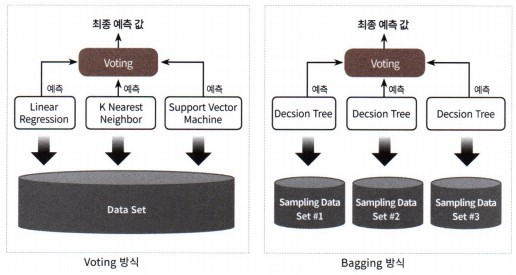

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블1.jpg')
# 보팅 방식 : (하드:다수결/소프트:합산평균), 다른 모델 여러개
# 배깅 방식 : 소프트보팅을수행, 동일 모델 여러개, 훈련데이터가 중첩되서 각각 들어간다

## 보팅

- Voting
- 다른 알고리즘 여러개 사용
- 병렬 연결
- 종류
  - 하드 보팅
    - 다수결(홀수개의 알고리즘 조합이 유리) 선택
    - 최빈값 선택
  - 소프트 보팅
    - 하드 보팅 문제점 -> 선거에는 이겼으나 총 득표수는 적었다
    - 모델별로 결정되는 확률값을 각각 더해서 평균으로 선택
    - 성능이 더 좋은것으로 판단

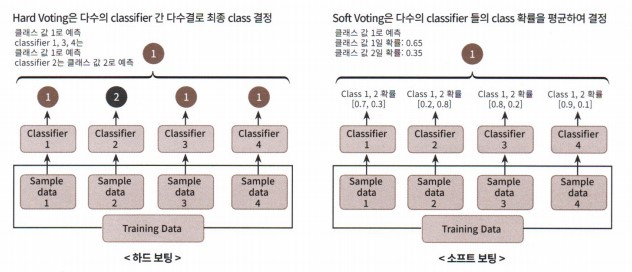

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블2_보팅.jpg')

In [ ]:
# 보팅 구현
# 알고리즘 여러개 (3개로 홀수개)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# 보팅 담당
from sklearn.ensemble import VotingClassifier
# 데이터셋
from sklearn.datasets import load_breast_cancer
# 데이터 스픗릿 도구
from sklearn.model_selection import train_test_split
# 평가도구
from sklearn.metrics import accuracy_score

# 데이터 분석용
import numpy as np
import pandas as pd

In [ ]:
# 데이터 로드
cancer = load_breast_cancer()

In [ ]:
# 데이터 스플릿, 75:25, 층화 처리, 난수 시드 0
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, 
                        train_size=0.75, stratify=cancer.target, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [ ]:
# 정답의 비율 체크 -> 나중에 EDA 할대는 독립변수의 범주형값별로 정답 비율 체크
cnt_0, cnt_1 = np.unique( cancer.target,  return_counts=True)[1]
print(cnt_0, cnt_1, cnt_0/cnt_1)
# 훈련용/테스트용 데이터 중 정답에서 0과 1의 개수 및 비율을 각각 구하시오 
cnt_0, cnt_1 = np.unique( y_train,  return_counts=True)[1]
print(cnt_0, cnt_1, cnt_0/cnt_1)
cnt_0, cnt_1 = np.unique( y_test,  return_counts=True)[1]
print(cnt_0, cnt_1, cnt_0/cnt_1)

# 데이터 스프릿할때 층화를 써서 비율을 유지하게 데이터를 나눈다!!

212 357 0.5938375350140056
159 267 0.5955056179775281
53 90 0.5888888888888889


In [ ]:
# 알고리즘 생성
lr_clf  = LogisticRegression()
knn_clf = KNeighborsClassifier( n_neighbors=8 )
dc_clf  = DecisionTreeClassifier()
# 보팅, 별칭은 대소문자 관계 없음
vc_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf),('dc',dc_clf)], voting='soft')

In [ ]:
# 학습 혹은 훈련
vc_clf.fit( X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8)),
                             ('dc', DecisionTreeClassifier())],
                 voting='soft')

In [ ]:
vc_clf.score( X_test, y_test )

0.951048951048951

## 배깅

- Bagging
- **개별 모델들이 서로 다른 샘플링 데이터를 훈련에 사용**
- 병렬연결
- **동일 알고리즘**을 여러개 만들어서, 보팅을 수행(소프트)
- 대표 알고리즘
  - 랜덤포레스트
    - 집단 학습 기반 모델
    - 빠른 학습 수행 속도를 가진다
    - 데이터는 램덤으로 **무작위 샘플링 수행** (중복적으로 여러 모델에 등장할 수도 있다)

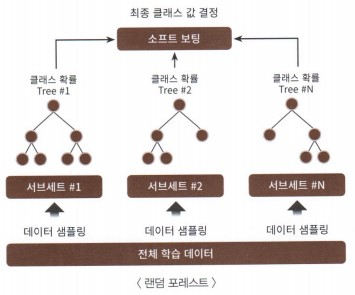

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블2_배깅_랜덤포레스트.jpg')

# 동일한 여러 알고리즘, 전체데이터에서 샘플링 하여 학습 진행, 소프트 보팅으로 결정

### 데이터 샘플링

- 서브 세트에는 중복된 데이터가 나올수 있다
  - 그림 참고 : 1, 2, 3, 3, 3,...
- 랜덤하기 때문엔 각각의 서브 세트에는 나온 데이터가 또 나올수도 있다
- 이런 방식 
  - 부트 스트래핑
  - 배깅의 특징이면서, 이를 통해 동일 알고리즘의 다양성을 부여하는 전략

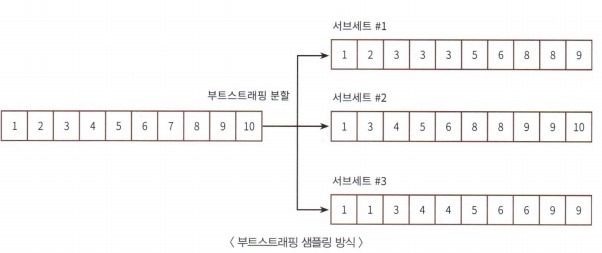

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블2_배깅_부트스트래핑.jpg')

In [ ]:
# 데이터는 동일 데이터 사용 (cancer) X_train, ...
# 알고리즘 생성
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( random_state=0 )

In [ ]:
# 훈련
rf_clf.fit( X_train, y_train )

RandomForestClassifier(random_state=0)

In [ ]:
# 예측및 평가
rf_clf.score( X_test, y_test )

0.9440559440559441

In [ ]:
# 피처 중요도 체크 -> 시각화, 제거 목록 작성
tmp_s = pd.Series( rf_clf.feature_importances_, index=cancer.feature_names )
tmp_s

mean radius                0.029691
mean texture               0.017209
mean perimeter             0.069298
mean area                  0.041130
mean smoothness            0.005004
mean compactness           0.006369
mean concavity             0.080562
mean concave points        0.092007
mean symmetry              0.004352
mean fractal dimension     0.004284
radius error               0.021363
texture error              0.004205
perimeter error            0.013548
area error                 0.023038
smoothness error           0.002889
compactness error          0.005932
concavity error            0.004687
concave points error       0.002788
symmetry error             0.003081
fractal dimension error    0.002292
worst radius               0.125422
worst texture              0.017049
worst perimeter            0.195366
worst area                 0.074379
worst smoothness           0.009489
worst compactness          0.008652
worst concavity            0.021721
worst concave points       0

In [ ]:
tmp_s = tmp_s.sort_values( ascending=False )
tmp_s[:5]

worst perimeter         0.195366
worst radius            0.125422
worst concave points    0.101498
mean concave points     0.092007
mean concavity          0.080562
dtype: float64

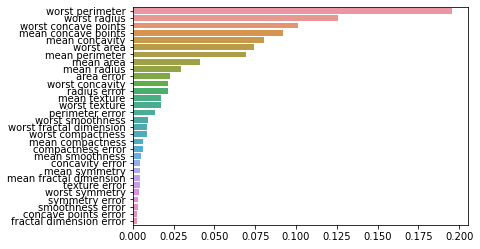

In [ ]:
import seaborn as sns
sns.barplot( x=tmp_s, y=tmp_s.index);
# 특정 기준을 세워서 제거할 컬럼을 시작적으로 표현할수 있다

In [ ]:
# 정확도 올려라 => 하이퍼파라미터 튜닝 + 그리드서치 + CV(교차검증 같이 추가)
from sklearn.model_selection import GridSearchCV

# n_jobs : CPU 코어를 몇개 사용할것인가? -1이면 모두 다 동원해라
rf_clf = RandomForestClassifier( random_state=0, n_jobs=-1)
param_grid = {
  'n_estimators'  : [100, 120, 200],
  'max_depth'     : [6, 8, 10, 12],
  'min_samples_split' : [6, 12, 18],
  'min_samples_leaf'  : [8, 16, 24]
}
grid_cv = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1)

In [ ]:
# 학습
grid_cv.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 16, 24],
                         'min_samples_split': [6, 12, 18],
                         'n_estimators': [100, 120, 200]})

In [ ]:
grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 6,
  'min_samples_leaf': 8,
  'min_samples_split': 18,
  'n_estimators': 200},
 0.9554309165526677)

## 부스팅(*)

- Boosting
- 최근 몇년간 가장 많은 사용빈도를 보인다
  - 경쟁 대회에서 많이 보인다
- 원리
  - 여러개의 약한 분류기, 순차적으로(직선적) 학습  및 예측을 수행하여, **잘못 예측한 데이터에 가중치를 부여**하여 오류를 개선하여 다음 학습에 반영하는 방식

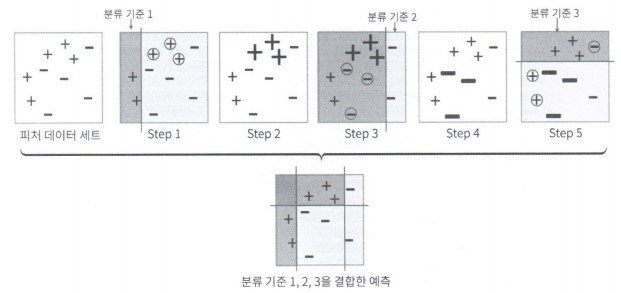

In [ ]:
# AdaBoost의 가중치 처리하는 패턴
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_부스트.jpg')

- 부스트 계열의 알고리즘들은 가중치를 어떯게 계산, 업데이트 하는지 방식에 큰 차이가 있다, 파라미터수에도 차이가 있고, 규칙노드를 분기하는 지니계수, 정보이득지수 등에 적용 지침이 다르다
- 위의 과정이 반복되면서, 모델 성능이 점점 향상된다
  - 학습 시간이 오래 걸린다

### AdaBoost (초기모델)

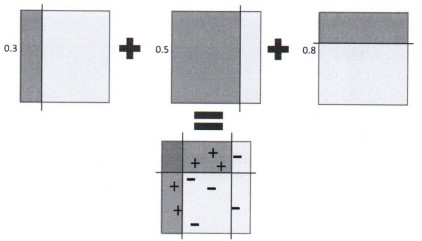

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_부스트2.jpg')
# 여러번 반복적으로 분류를 진행하면서, 가중치가 계산되고 아래처럼 영역이 잡히게 된다
# 이것을 합산하면, 색의 차이들이 나타나게 된다 (수치적으로 존재)
# 이런 특정값을 기준으로 분류를 하게 되고 이를 통해 성능이 향상되는 방식

### GBM

- Gradient Boost Machine
- Ada와 차이점은 **가중치를 업데이트 하는 방식의 차이**
- **경사하강법**라는 가중치 업데이트 전략을 도입
  - **특정값이 필요(학습률, eta, learning rate, 0.001 부여)**
  - 예측 수행후 오차값에 가중치 부여할때 위의 값을 부여
  - 미세조정하는 느낌 -> 학습 -> 예측 -> 미세조정
  - 이값을 추척해 보면 기울어진 형태를 취하게 된다
  - **딥러닝시 최적화 기법 정리때 다른 방식들과 비교하여 정리**(*)
  - **시간이 소요된다!!**
  - 오차 = 실제값-예측값
    - 오차값을 최소로 하는 방향으로 예측값을 계산하는 특정 식에 가중치를 조정하여 오차를 줄이겠근 진행 방식

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [ ]:
s_time = time.time()

# GBM 처리
'''
  - 파라미터가 상당히 많다(상대적으로) => LGBM : 파라미터를 줄이자, 균형을 비대칭 OK(목표가 다름)
  - 기존의 트리계열 대비, loss:손실값지표(오차계산을 위해서), 
    learaing_rate:학습률(경사하강법의 미세조정 기준값 추가) 
'''
gb_clf = GradientBoostingClassifier( random_state=0 )
gb_clf.fit( X_train, y_train )
print( gb_clf.score( X_test, y_test ) )

e_time = time.time() - s_time
print( f'소요시간 {e_time}' )

0.958041958041958
소요시간 0.695798397064209


### XGBoost (*)

- GBM을 개선
  - 문제점중 느린 학습수행시간, 과적합방지방안(없음) 등등 이것을 보완
- **병렬학습** 가능하게 제공
  - 학습 효율을 극대화
- 하이퍼파라미터는 GBM과 동일
  - **과적합방지 파라미터 추가 (L1, L2추가)**
- 딥러닝에서 사용하는 **조기학습종료** 기능을 추가
- 종류
  - **파이썬 레퍼 **
    - DMatrix 라는 객체를 통해서 데이터셋 구성(전용)
  - **사이킷런 래퍼 **
- GBM보다 **상대적으로 빠른 학습 수행 능력**을 가짐


In [ ]:
# 파이썬 래핑 XGB
import xgboost as xgb

xgb.__version__

'0.90'

In [ ]:
# 데이터 준비
data_train = xgb.DMatrix( data=X_train, label=y_train )
data_test  = xgb.DMatrix( data=X_test,  label=y_test  )

#### 알고리즘 파라미터

- **booster (부스팅 알고리즘)**
  - 트리기반모델 : 'gbtree' or 'dart'
  - 선형기반모델 : 'gblinear'(잘 사용않함) 
  - **기본값 : 'gbtree'**
  - 특징 : 'gbtree' + dropout(과적합방지를 위해 특정 비율로 학습 방해 => 'dart'

- **objective (훈련목적)**
  - **회귀** : 'reg:squarederror' (기본값)
  - 확률값을 구하는 **이진분류** : 'binary:logistic'
  - 소프트맥스 함수(지분율계산)를 사용하는 **다중분류** : 'multi:softmax'
  - 확률값을 구하는 다중분류 : 'multi:softprob'


- **eta(learning_rate)**
  - 학습 비율 가중치를 조정하는 값
  - 부스팅 스텝을 반복하면서, **모델을 업데이트 하는데 사용하는 비율**
  - 기본값 : 0.3
  - 범위 : 0 ~ 1
  - 통상 : **0.0001 ~ 0.1 사용**

- **min_child_weight**(기본값 1)
  - **과대 적합 방지값(값이 클수록)**
  - 0 이상값 설정
  - 하위 노드단에서 요구되는 최소 가중치의 합
  - 각 노느단계에서 W가 생성이 될것이고, 그 값들을 미세 조정하게 되는데, 하위 노드단에서 그 단계까지 오는 모든 가중치의 합에 대한 제한값
  - 값이 너무 크면 언더피팅(과소적합)에 걸릴수 있다

- max_depth
  - 트리의 깊이
  - 과대 적합을 제어하는 파라미터
  - **기본값 6, 3 ~ 10일반적으로 사용**
  - 깊어지면 메모리 사용량이 급격히 많아짐(학습 속도 저하)

- max_leaf_nodes
  - 리프 노드의 최대 개수

- gamma(기본값 0)
  - 노드가 분할시 필요한 최소 감소값 지정(적용해 보면서 변화를 체크)
  - 손실 감소가 gamma보다 크면 노드 분할
  - **값이 클수록 과대 적합 방지 효과 있음**

- subsample(기본값 1)
  - 개별 트리를 훈련할때 사용할 데이터 샘플링 비율
  - 전체 데이터에서 얼마나 샘플링 할지
  - 0 ~ 1 사이값
  - 0.5 -> 전체 데이터 50% 사용하
  - **0.6 ~ 1 사용**

- colsample_bytree
  - 각 트리에서 피처 샘플링 비율
  - 전체 피처에서 얼마나 샘플링 할지
  - 기본 1, 0~1
  - **0.6 ~ 1 일반적으로 사용**

- lambda
  - 가중치에 대한 **L2 규제 조정값 (릿지 알고리즘)**
  - 값이 크면 **과대적합 방지효과** 있음
  - 기본 1

- alpha
  - 가중치에 대한 **L1 규제 조정값 (라쏘 알고리즘)**
  - 값이 크면 **과대적합 방지**효과 있음
  - 기본 1

- scale_pos_weight
  - 불균형 데이터 가중치 조정값
  - 타깃갓이 불균형할때 양성값에 이 값을 가중치를 줘서 균형을 맞춤
  - **데이터 분포에대한 불균형을 맞춰주는 지표**
  - 일반적으로 0보다 큰값을 부여한다
  - 기본값 1

- random_state
  - 랜덤시드

#### 학습시 파라미터

- 알고리즘의 각 단계에서 최적화를 목표로 사용하는 파라미터이다

- objective -> 입력 데이터에 대비하여 설정
  - 기본값 (reg:linear)
  - binary:logistic : 이진 분류를 위한 로지그틱회귀, 분류에 대해 예측된 확률값을 반환한다
  - multi:softmax   : softmax를 사용한 다중 클레스 분류, 분류에 대해 예측된 클레스(정답)을 반환한다
  - multi:softprob  : softmax과 유사하지만, 각 클레스에 대한 예상 확률을 반환한다

- eval_metric : 평가도구, 성능평가지표
  - 회귀 분야 -> 손실함수 -> 값을 줄이는데 방점
    - rmse : root mean square error : 정답과 예측값 사이의 오차율 -> 작을수록 -> 예측값이 정답에 가깝다
    - mse  : mean square error : 평균 제곱근 오차
    - mae  : mean absolute error : 평균 절대값 오차
  - 분류 분야 
    - logloss : 기본값
    - error
    - merror
    - mlogloss
    - auc

- seed
  - 난수 시드
  - 재현성 -> 동일한 결과를 매번 낼수 있는가? -> 실험환경에 대한 중요한 파라미터, 모든 조건을 고정하고 한개의 파라미터를 수정하면서 테스트 한다면, 해당 파라미터가 성능에 어떤 영향을 미치는지 확인 가능 -> 데이터의 재현성이 필요하다!

In [ ]:
# 하이퍼파랴미터 (알고리즘 파라미터, 학습 관련 파라미터 같이 기술)
params = {
    'objective'   :'binary:logistic',   # 데이터는 암을 진단하는 이진 분류이므로
    'eval_metric' :'logloss',           # 예측이 잘되었는지 판단 -> 평가도구 -> 손실값(실제-예측사이의 차이값) -> 가중치 부여(업데이트) -> 다시 학습
    'max_depth'   :6,                   # 트리 깊이
    'eta'         :0.1,                 # 0.001 ~ 0.1 사이값으로 부여, 기본값과 동일하게 세팅
    'early_stopping_rounds' :100        # 조기학습 종료, 100회 기준으로 판단
}

In [ ]:
# 알고리즘 생성 및 훈련
'''
params : 하이퍼파라미터 목록(알고리즘용, 학습관련용)
dtrain : 훈련 데이터 DMatrix 타입
num_boost_round : 부스팅이 최적 분류를 하기 위해 지정한 반복 횟수, 횟수가 많으면, 
                  과대적합 될수 있다. 이 값을 늘리면 -> eta는 내려야 한다, 기본값 10
evals : 모델 성능 평가용 검증 데이터 셋

'''
evals_data = [ (data_train, 'train'), (data_test, 'eval') ] 
# 훈련의 결과를 받아서 예측한다 => 훈련된 모델을 리턴받는다 => 래핑모델
xgb_model  = xgb.train( params=params, dtrain=data_train, 
           num_boost_round=400, evals=evals_data,  )

[0]	train-logloss:0.608119	eval-logloss:0.618154
[1]	train-logloss:0.535873	eval-logloss:0.550963
[2]	train-logloss:0.476997	eval-logloss:0.500276
[3]	train-logloss:0.424985	eval-logloss:0.453027
[4]	train-logloss:0.381194	eval-logloss:0.414537
[5]	train-logloss:0.342378	eval-logloss:0.38095
[6]	train-logloss:0.309291	eval-logloss:0.355112
[7]	train-logloss:0.279145	eval-logloss:0.329946
[8]	train-logloss:0.252796	eval-logloss:0.307393
[9]	train-logloss:0.230185	eval-logloss:0.290685
[10]	train-logloss:0.209007	eval-logloss:0.272832
[11]	train-logloss:0.190544	eval-logloss:0.257617
[12]	train-logloss:0.1743	eval-logloss:0.244707
[13]	train-logloss:0.159234	eval-logloss:0.232147
[14]	train-logloss:0.146566	eval-logloss:0.224408
[15]	train-logloss:0.13443	eval-logloss:0.214534
[16]	train-logloss:0.123809	eval-logloss:0.205925
[17]	train-logloss:0.114175	eval-logloss:0.198322
[18]	train-logloss:0.105581	eval-logloss:0.192092
[19]	train-logloss:0.097937	eval-logloss:0.185819
[20]	train-log

- 해석
  - 총 400 획 학습 진행
    - 400회 가중치 조정했다
  - 손실값이 줄어들겠금, 미세조정을 라운드 별로 진행했다
  - 130회 이르러서, 검증용 손실값은 0.14~15사이에 수렴하였다 -> 이정도면 조기 학습 종료 조건을 부여해서 마무리했어도 되었다(더이상의 학습은 의미 없음)

In [ ]:
y_pred = xgb_model.predict( data_test )

In [ ]:
# 확률값으로 나오고, 0.5보다 크면 1, 아니면 0으로 처리 가능
y_preds = [1 if x > 0.5 else 0 for x in y_pred]

y_preds[:10]

[1, 0, 0, 1, 0, 1, 0, 0, 0, 1]

In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def cal_score( y_true, y_pred ):
  print( f'혼동행렬 { confusion_matrix( y_true, y_pred ) }' )
  print( f'정확도 { accuracy_score( y_true, y_pred ) }' )
  print( f'정밀도 { precision_score( y_true, y_pred ) }' )
  print( f'재현율 { recall_score( y_true, y_pred ) }' )
  print( f'조화평균 { f1_score( y_true, y_pred ) }' )
  print( f'roc-auc { roc_auc_score( y_true, y_pred ) }' )

cal_score( y_test, y_preds )

혼동행렬 [[50  3]
 [ 2 88]]
정확도 0.965034965034965
정밀도 0.967032967032967
재현율 0.9777777777777777
조화평균 0.9723756906077348
roc-auc 0.9605870020964361


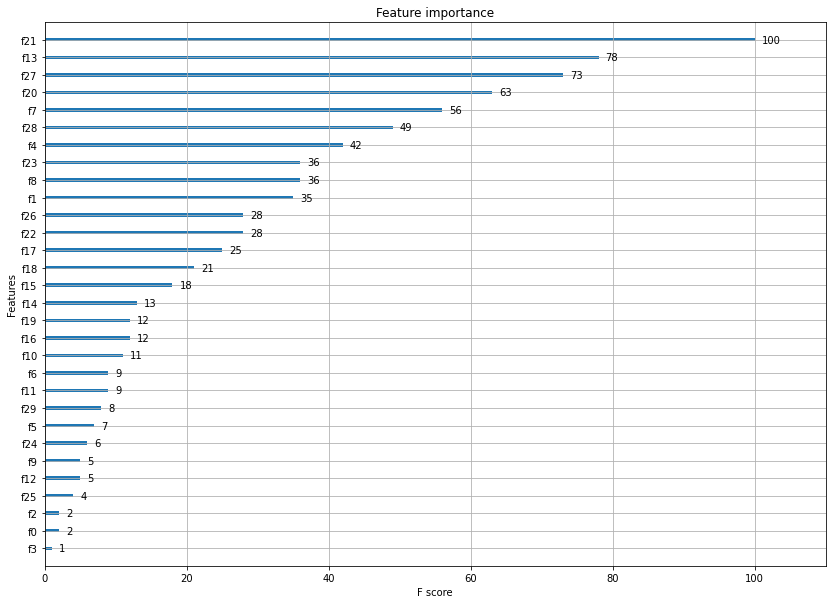

In [ ]:
# 변수 중요도 시각화
from xgboost import plot_importance

_, ax = plt.subplots( figsize=(14,10) )
plot_importance( xgb_model, ax=ax );

# fXX 형태로 피처명이 나온것이 다소 불편함

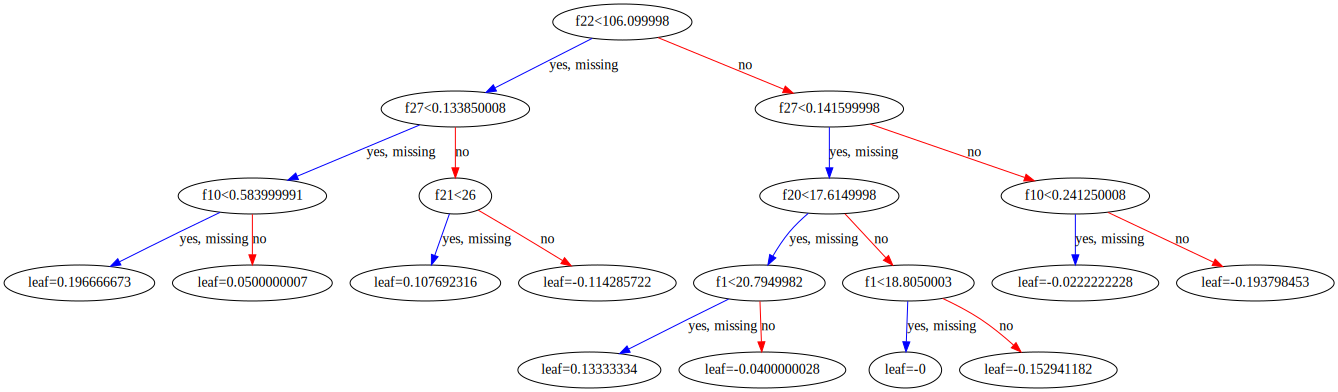

In [ ]:
# 시각화
from xgboost import to_graphviz
import graphviz

to_graphviz(xgb_model)
# 가중치 조정을 통해 조정된 규칙노드의 조건이 확인되고 있다
# 부스팅이 학습을 통해 완성된 트리 형태를 확인할수 있었다

In [ ]:
# XGB 교차검증(파이썬 래핑 자체 제공) <-> 사이킷런 래핑은 KFold를 이용하여 처리(그리드서치CV)
xgb.cv(params=params, dtrain=data_train, num_boost_round=5, nfold=3,  metrics='logloss' )
# 라운드가 지날때 마다 logloss-mean값이 줄어들고 있다 => 손실값이 작아짇고 있다 => 성능이 높아지고 있다

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.608338,0.001436,0.615945,0.002428
1,0.538009,0.002339,0.551923,0.003594
2,0.478754,0.002643,0.499526,0.006507
3,0.428757,0.003429,0.454921,0.007928
4,0.384959,0.003459,0.416099,0.010507


In [ ]:
# 사이킷런 래핑 스타일 - 상대적으로 파이썬 래핑보다 간결하게 구현한다
from xgboost import XGBClassifier

xgb_sci_wrapper = XGBClassifier(n_estimators=400, random_state=0 )

eval_set = [ (X_test, y_test)]
# 조기학습 종료 체크 상황: 어느 정도 값에 수렴(변동폭이 없을때) 체크
# 이후로 100회간 학습의 결과가 차이가 없다면 (검증 데이터의 결과가 기준) 그대로 종료
xgb_sci_wrapper.fit( X_train, y_train, early_stopping_rounds=100, eval_set=eval_set,
                     verbose =True, eval_metric='logloss')

# 예측
cal_score( y_test, xgb_sci_wrapper.predict( X_test ) )

[0]	validation_0-logloss:0.618659
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.5527
[2]	validation_0-logloss:0.501015
[3]	validation_0-logloss:0.459627
[4]	validation_0-logloss:0.424374
[5]	validation_0-logloss:0.388941
[6]	validation_0-logloss:0.35796
[7]	validation_0-logloss:0.335656
[8]	validation_0-logloss:0.312168
[9]	validation_0-logloss:0.29248
[10]	validation_0-logloss:0.278442
[11]	validation_0-logloss:0.262353
[12]	validation_0-logloss:0.248206
[13]	validation_0-logloss:0.239223
[14]	validation_0-logloss:0.227359
[15]	validation_0-logloss:0.217469
[16]	validation_0-logloss:0.209173
[17]	validation_0-logloss:0.203611
[18]	validation_0-logloss:0.197384
[19]	validation_0-logloss:0.191352
[20]	validation_0-logloss:0.188657
[21]	validation_0-logloss:0.185621
[22]	validation_0-logloss:0.181609
[23]	validation_0-logloss:0.17988
[24]	validation_0-logloss:0.176785
[25]	validation_0-logloss:0.17351
[26]	validation_0-logloss:0.170994
[2

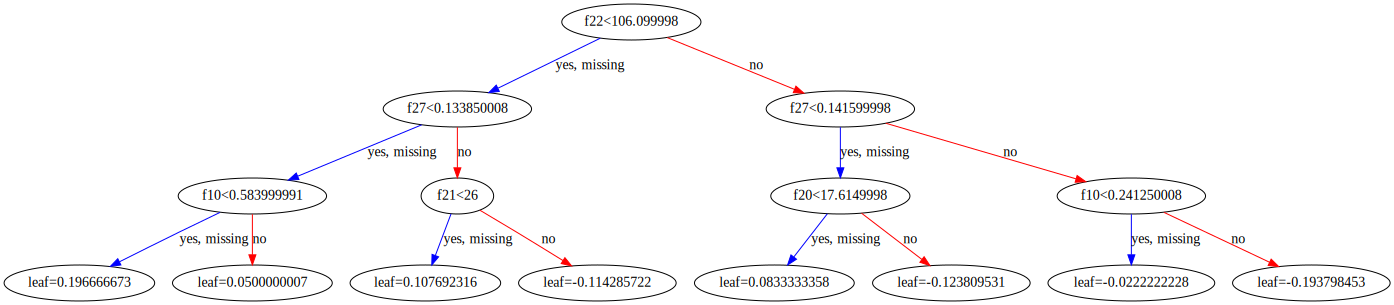

In [ ]:
to_graphviz(xgb_sci_wrapper)

### LightGBM (LGBM) (*)

- 마이크로소프트에서 개발
- XGB가 부스트 계열에서는 가장 빨랐지만, 타 알고리즘에 비하면 느리다
- 하이퍼파라미터 너무 복잡하다
- 개선
  - 학습 시간 단축, 리소스 사용 줄임, 파라미터도 간결하게
- 특징
  - 리프를 중심으로 트리 분할을 진행
    - 기준의 균형이 아닌 리프 중심의 비대칭 형태로 진행
    - 균형을 포기하고, 성능을 취한 형태 -> 연산비용 절감
    - 가지치기 행위가 줄어든다

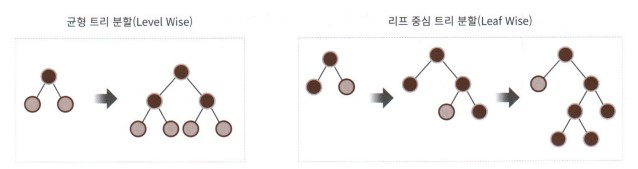

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_lightGBM.jpg')

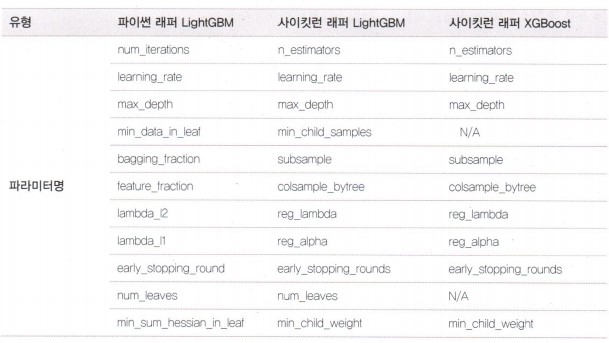

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_lightGBM_param.jpg')
# 파라미터 전략
# A = 결정 트리 파라미터
# B = A + 부스팅특징 파라미터 => XGB
# B =거의유사= LGBM

In [ ]:
# 파이썬 래핑
import lightgbm
# 사이킷런 래핑
from lightgbm import LGBMClassifier

lightgbm.__version__

'2.2.3'

In [ ]:
# 사이킷런 래핑 방식
lgbm_clf = LGBMClassifier( n_estimators=400 )

In [ ]:
# 훈련
lgbm_clf.fit(X_train, y_train, 
    # 조기학습 종료 체크는 검증용 데이터로 수행한다,. 
    early_stopping_rounds=100, eval_metric='logloss', eval_set=eval_set, # 3개는 같이 움직임
    verbose=True # 로그 출력             
)

[1]	valid_0's binary_logloss: 0.588097	valid_0's binary_logloss: 0.588097
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.529326	valid_0's binary_logloss: 0.529326
[3]	valid_0's binary_logloss: 0.480372	valid_0's binary_logloss: 0.480372
[4]	valid_0's binary_logloss: 0.440457	valid_0's binary_logloss: 0.440457
[5]	valid_0's binary_logloss: 0.408131	valid_0's binary_logloss: 0.408131
[6]	valid_0's binary_logloss: 0.378375	valid_0's binary_logloss: 0.378375
[7]	valid_0's binary_logloss: 0.350855	valid_0's binary_logloss: 0.350855
[8]	valid_0's binary_logloss: 0.32972	valid_0's binary_logloss: 0.32972
[9]	valid_0's binary_logloss: 0.310253	valid_0's binary_logloss: 0.310253
[10]	valid_0's binary_logloss: 0.293196	valid_0's binary_logloss: 0.293196
[11]	valid_0's binary_logloss: 0.278166	valid_0's binary_logloss: 0.278166
[12]	valid_0's binary_logloss: 0.265973	valid_0's binary_logloss: 0.265973
[13]	valid_0's binary_logloss: 0.25447	valid_0's

LGBMClassifier(n_estimators=400)

In [ ]:
# 튜닝이 필요할듯, 파라미터 조정도 별로 않해서 기본 성능이 낮게 나옴
cal_score( y_test, lgbm_clf.predict( X_test ) )

혼동행렬 [[48  5]
 [ 7 83]]
정확도 0.916083916083916
정밀도 0.9431818181818182
재현율 0.9222222222222223
조화평균 0.9325842696629215
roc-auc 0.9139412997903564


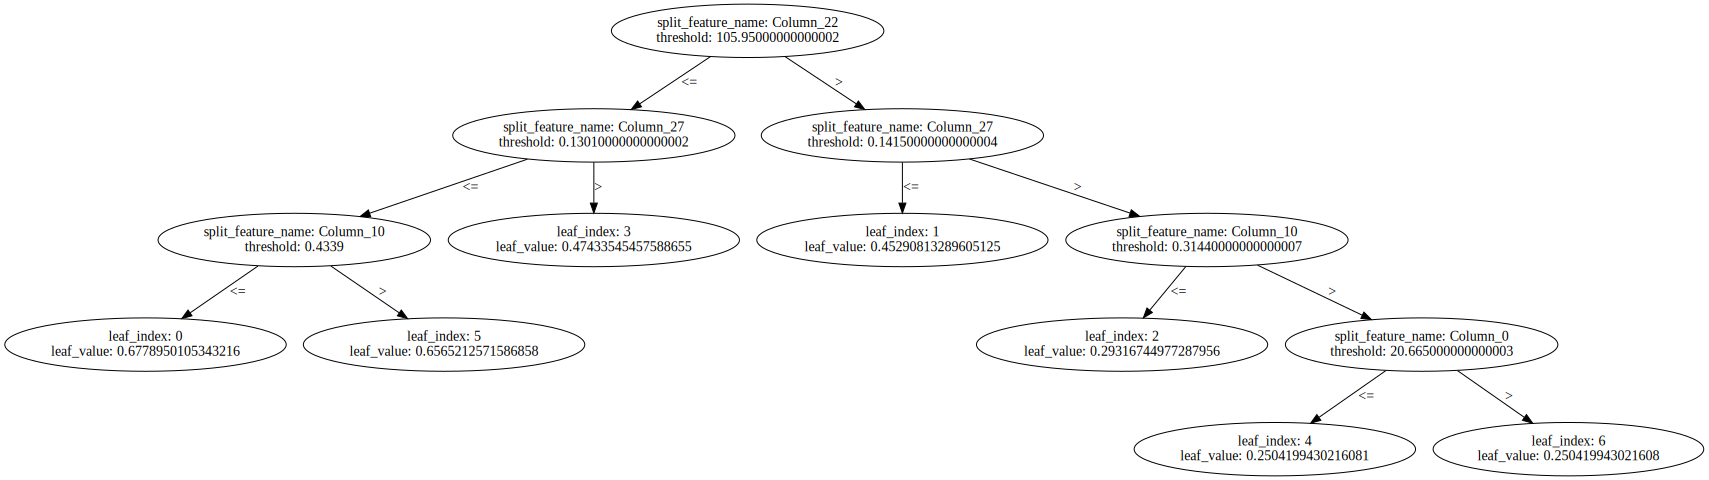

In [ ]:
#미지원, 차후 체크
from lightgbm import create_tree_digraph
create_tree_digraph( lgbm_clf )
# 비대칭 형태가 깊진 않지만, 알고리즘의 특징으로 보인다
# 임계값 기준, 피처이름 노출

### 서드파트 (CatBoost)

## 스태킹

- stacking
- 특징
  - 모델은 2단계 걸쳐서 생성
  - 1차 모델의 예측 결과가, 2차 모델의 훈련 데이터가 되는 형태
  - 메타 학습 기법
- 모델
  - 1차 모델 : 기본 데이터를 기반으로 학습후 예측, 서로 다른 알고리즘 사용
  - 2차 모델 : 예측 결과를 훈련데이터로 사용하여 다시 학습, 예측 수행

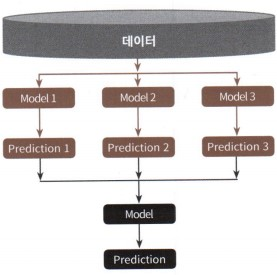

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_스테킹1.jpg')

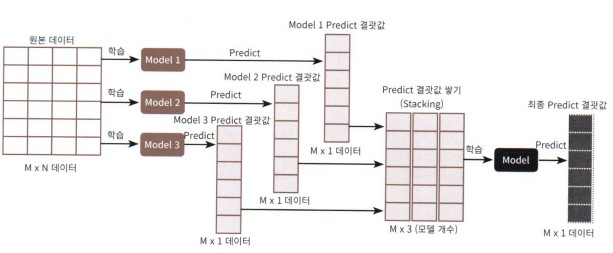

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_스테킹2.jpg')

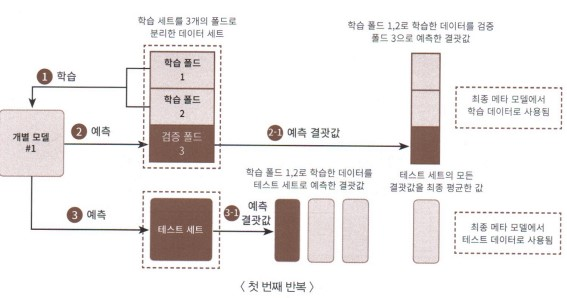

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_스테킹3.jpg')

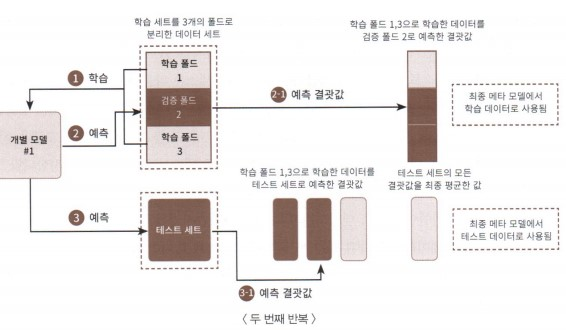

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_스테킹4.jpg')

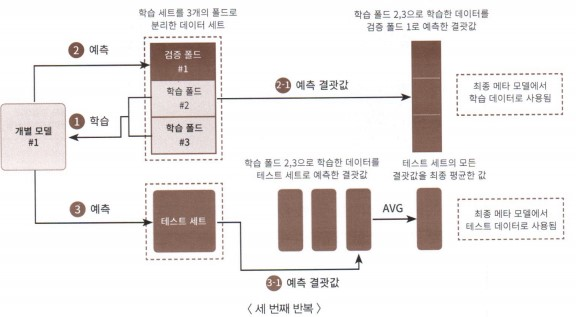

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_스테킹5.jpg')

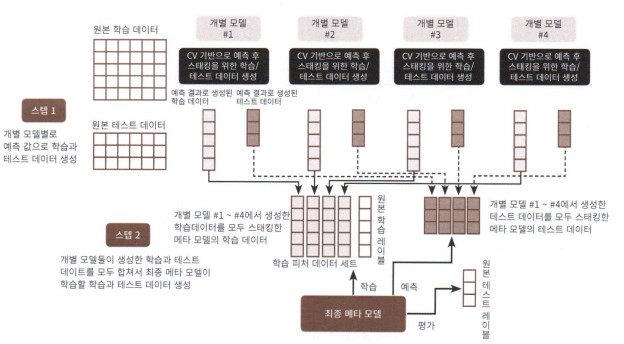

In [ ]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/분류_앙상블3_스테킹6.jpg')

## 구현

In [10]:
# 해당 셀에 대한 수행시 소요시간 출력
%%time 

# 모듈
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression # 2차모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

import numpy as np
import pandas as pd

# 데이터로드 cancer, 데이터 스플릿 태스트 25%, 층화기능사용, 난수 시드 0 고정 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test =  train_test_split( cancer.data, cancer.target, test_size=0.25,  
                                                      stratify=cancer.target, random_state=0)
# 1차 모델 알고리즘 4개 준비
knn_clf = KNeighborsClassifier(   n_neighbors = 4  )
dc_clf  = DecisionTreeClassifier( max_depth = 6    )
ada_clf = AdaBoostClassifier(     n_estimators=100 )
rf_clf  = RandomForestClassifier( n_estimators=100,  random_state=0 )

# 1차 모델 학습후 -> (2차모델의 훈련용데이터, 2차모델의 테스트데이터)
def make_stacking_model1_data( clf, train_X, train_y, test_X, folds_n=7 ):
  '''
    - Parameters
      - clf:모델, train_X:훈련용피처, train_y:훈련용정답, test_X:테스트용피처, folds_n=7:폴드수
  '''
  # K폴드 생성
  kf                    = KFold(n_splits=folds_n, shuffle=False)
  # 2차모델의 훈련용데이터용 배열(그릇, 버퍼), 함수 수행후 결과물, 리턴값, 출력값
  # 검증하여 예측하면 1/7 세팅 -> 7번 반복 => 7/7이 채워져서 => 1이 다 채워진다
  train_fold_valid_pred = np.zeros( ( train_X.shape[0] , 1) )  
  # 2차모델의 테스트데이터용 배열(그릇, 버퍼), 함수 수행후 결과물, 리턴값, 출력값
  # 검증폴드 세트수 만큼 테스트 데이터 예측 수행함
  # 테스트데이터를 통째로 예측 -> 총 7개의 결과물이 만들어지는것이다
  test_pred             = np.zeros( ( test_X.shape[0], folds_n) ) 

  # 폴드에서 세트 추출해서 학습->예측->결과담기 
  # X_train을 7등분 해서 1세트는 검증용, 6세트는 훈련용으로 분할 => 옮겨가면서 7번 반복 
  for idx, ( train_idx, vaild_idx ) in enumerate( kf.split( X_train ) ):    
    X_tr = train_X[ train_idx ] # 펜시인덱싱이용하여 훈련용 데이터 추출
    y_tr = train_y[ train_idx ] # 펜시인덱싱이용하여 정답 데이터 추출
    X_va = train_X[ vaild_idx ] # 펜시인덱싱이용하여 검증용 데이터 추출
    # 학습 
    clf.fit( X_tr, y_tr )    
    # 검증 데이터를 넣어서 예측 수행 -> 1차원 배열로 나옴
    v_pred = clf.predict( X_va )
    # 결과담기
      # 검증 데이터를 예측한 결과를 그릇에 담기
      # 데이터가 비연속적인 자리를 가진다면 펜시인덱싱을 이용하여 해당자리에 세팅하는 전략
      # 여기서는 KFold가 suffle False 였으므로 연속이였을 뿐, True라면 추가하는 방식은 불가
    train_fold_valid_pred[ vaild_idx, : ] = v_pred.reshape( -1, 1) 
      # 테스트 데이터 예측 수행 -> 1차원 , 전체가 한개의 피처처럼 담긴다
      # 1차원 데이터를 통째로 특정 위치에 넣었다
    test_pred[ : , idx ] = clf.predict( X_test )

  # 테스트 데이터 (143, 7) => 평균 처리 => (143, 1)  
  # 테스트 데이터를 평균내어서 반환
  test_pred_avg = np.mean( test_pred, axis=1 ).reshape( -1, 1 )
  return train_fold_valid_pred, test_pred_avg

knn_train, knn_test = make_stacking_model1_data( knn_clf, X_train, y_train, X_test  )
dc_train,  dc_test  = make_stacking_model1_data( dc_clf,  X_train, y_train, X_test  )
ada_train, ada_test = make_stacking_model1_data( ada_clf, X_train, y_train, X_test  )
rf_train,  rf_test  = make_stacking_model1_data( rf_clf,  X_train, y_train, X_test  )


CPU times: user 4.61 s, sys: 127 ms, total: 4.74 s
Wall time: 5.39 s


In [12]:
# 2차 모델 처리
# 데이터 병합 처리 => np.concatenate()
X_train_stacking = np.concatenate( (knn_train, dc_train, ada_train, rf_train), axis=1 )
X_test_stacking  = np.concatenate( (knn_test, dc_test, ada_test, rf_test), axis=1 )

print( X_train_stacking.shape, X_test_stacking.shape )

# 2차 모델 생성->학습->예측및평가
lr_clf = LogisticRegression()
lr_clf.fit( X_train_stacking, y_train )
accuracy_score( y_test, lr_clf.predict( X_test_stacking ) )

(426, 4) (143, 4)


0.972027972027972

- 절차
  - 문제 이해
  - 데이터 이해 - eda - 분석 및 시각화, 피처 엔지니어링 대상 선정 및 방식 결정
  - 베이스라인 모델 구축 - 제출 - 평가확인
    - 피처 엔지리어링 진행 - 아이디어
  - 최적알고리즘1 교체 - 최적화- 제출
  - 최적알고리즘2 교체 - 최적화- 제출